In [1]:
import networkx as nx
import numpy as np
from matplotlib.pyplot import *
from sklearn.metrics import mean_squared_error
import os
import scipy
from math import sqrt

In [2]:
from preprocessing_net import get_cyclic_net
from ESN_class import ESN
from mutual_info import memory_capacity_n
from nrmse_calc import nrmse, nrmse_n

In [3]:
##################################################################################

In [4]:
#                                   FUNCTIONS                                    #

In [5]:
def testing_gene_net(directory,input_data,data):
    csv_files= [file for file in os.listdir(directory) if file.startswith("network_edge_list")]
    print(csv_files)
    MI_by_file={}
    for file in csv_files:
        filename=file[file.index("list")+5:file.index(".csv")]
        net=ESN(os.path.join(directory, file),1,1,0.95)
        net.initialize()
        net.collect_states(input_data,initLen,trainLen)
        net.calculate_weights(input_data,initLen,trainLen)
        net.run_generative(input_data,testLen,trainLen)
        MI_by_file[filename]=memory_capacity_n(net.Y, data,100)
        nrmse= sqrt(mean_squared_error(data[trainLen+1:trainLen+errorLen+1],net.Y[0,0:errorLen])/np.std(net.Y[0,0:errorLen]))
        print(net.res_size, 'NRMSE = ' + str( nrmse ))
        print(memory_capacity_n(net.Y, data,20))
        
    return MI_by_file

In [6]:
def testing_gene_net_file(directory,file):
    print(file)
    filename=file[file.index("list")+5:file.index(".csv")]
    net=ESN(os.path.join(directory, file),1,1,0.95)
    net.initialize()
    net.collect_states(data,initLen,trainLen)
    net.calculate_weights(data,initLen,trainLen)
    net.run_generative(data,testLen,trainLen)
    nrmse= sqrt(mean_squared_error(data[trainLen+1:trainLen+errorLen+1],net.Y[0,0:errorLen])/np.std(net.Y[0,0:errorLen]))
    print(net.res_size, 'NRMSE = ' + str( nrmse ))
    return memory_capacity_n(net.Y, data,100)

In [7]:
def testing_gene_net_derivative(directory,a,b,c,n):
    csv_files= [file for file in os.listdir(directory) if file.startswith("network_edge_list")]
    Y_by_file={}
    X_by_file={}
    MI_by_file={}
    NRMSE_by_file={}
    for file in csv_files:
        print(file)
        filename=file[file.index("list")+5:file.index(".csv")]
        net=ESN(os.path.join(directory, file),1,1,0.95)
        net.initialize()
        net.collect_states_derivative(a,b,c,initLen,trainLen,testLen)
        net.calculate_weights_derivative(initLen,trainLen,n)
        net.run_predictive_derivative(a,b,c,testLen,trainLen)
        X_by_file[filename]=net.u
        Y_by_file[filename]=net.Y
        NRMSE_by_file[filename]=nrmse_n(net.Y,net.u)
        print(nrmse(net.Y[0,0:errorLen],net.u[trainLen+1:trainLen+errorLen+1]))
        MI_by_file[filename]=memory_capacity_n(net.Y, net.u,n)
        print(net.res_size, " FINISHED")
        
        #figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
        #plot( net.u[trainLen+1:trainLen+testLen+1], 'g' )
        #plot( net.Y.T, 'b' )
        #xlabel("time")
        #ylabel("signal")
        #title('Target and generated signals $y(n)$ starting at $n=0$ until $n=%s$' %testLen)
        #legend(['Target signal', 'Free-running predicted signal'])
        #savefig("plots-input-vs-output/%s_testLen" %filename)
        #show()
        
        #figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
        #plot( net.u[trainLen+1:trainLen+50+1], 'g' )
        #plot( net.Y.T[0:50], 'b' )
        #xlabel("time")
        #ylabel("signal")
        #title('Target and generated signals $y(n)$ starting at $n=0$ until $n=50$')
        #legend(['Target signal', 'Free-running predicted signal'])
        #savefig("plots-input-vs-output/%s_50" %filename)
        #show()
       
  
    return MI_by_file, X_by_file, Y_by_file, NRMSE_by_file
  


In [8]:
def testing_gene_net_derivative_file(directory,file,a,b,c,n):
    print(file)
    filename=file[file.index("list")+5:file.index(".csv")]
    net=ESN(os.path.join(directory, file),1,1,0.95)
    net.initialize()
    net.collect_states_derivative(a,b,c,initLen,trainLen,testLen)
    net.calculate_weights_derivative(initLen,trainLen,n)
    net.run_predictive_derivative(a,b,c,testLen,trainLen)
    X=net.u
    Y=net.Y
    nrmse_i=nrmse_n(net.Y,net.u,errorLen,trainLen)
    print(sqrt(mean_squared_error(net.u[trainLen+1:trainLen+errorLen+1],net.Y[0,0:errorLen]))/np.std(net.u[trainLen+1:trainLen+errorLen+1]))
    print(nrmse(net.Y[0,0:errorLen],net.u[trainLen+1:trainLen+errorLen+1]))
    mi_i=memory_capacity_n(net.Y, net.u,n)
    print(net.res_size, " FINISHED")
    return X,Y,nrmse_i,mi_i

In [9]:
def plot_MI_i(key,mi_dict,n):
    x=[]
    y=[]
    for i,MI in mi_dict.items():
        x.append(i)
        y.append(MI)
    plot(x,y,label=key)
    plot(n,mi_dict[n],marker='o')


In [10]:
def plot_MI_by_file(MI_by_file):
    for key in MI_by_file.keys():
        plot_MI_i(key, MI_by_file[key])
    legend(loc='upper left')
    show()
    

In [11]:
##################################################################################

In [12]:
#                                  PARAMETERS                                    #

In [13]:
# TRAINING AND TEST LENGHT
errorLen = 500
trainLen=9000
testLen=1000
initLen=200

#Files
csv_files=['network_edge_list_ENCODE.csv', 'network_edge_list_modENCODE.csv', 'network_edge_list_YEASTRACT.csv', 'network_edge_list_EcoCyc.csv', 'network_edge_list_DBTBS.csv']

#parameters ROSSLER
a=0.1
b=0.1
c=14

In [ ]:
##################################################################################

In [ ]:
#                                   TESTEOS                                      #

In [ ]:
# TESTEO get_cyclic_net
G=get_cyclic_net(os.path.join("Dataset1/", "network_edge_list_modENCODE.csv"))
len(G.nodes())

In [ ]:
#TESTEO adjacency matrix
net=ESN(os.path.join("Dataset1/", "network_edge_list_DBTBS.csv"),1,1,0.95)
net.W0

In [ ]:
#TESTEO initialize
net.initialize()
print(net.W.shape)
print(max(abs(scipy.linalg.eig(net.W)[0])))

In [ ]:
#TESTEO collect states
net.collect_states_derivative(a,b,c, initLen, trainLen, testLen)
net.X.shape
net.X[:,7]

In [ ]:
##################################################################################

In [ ]:
#                             RESULTS                                            #

In [ ]:
##ALL FILES

In [ ]:
print("With derivatives")
MI_by_file, X_by_file, Y_by_file, NRMSE_by_file=testing_gene_net_derivative("Dataset1/", a,b,c,20)

In [ ]:
for n in [0,10,20,50,80,100]:
    MI_by_file, X_by_file, Y_by_file, NRMSE_by_file=testing_gene_net_derivative("Dataset1/", a,b,c,n)
    figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
    title("n="+str(n))
    plot_MI_by_file(MI_by_file)

In [ ]:
##SINGLE FILE

In [ ]:
#una n

network_edge_list_DBTBS.csv
1.46208776758
1.46208776758
13  FINISHED


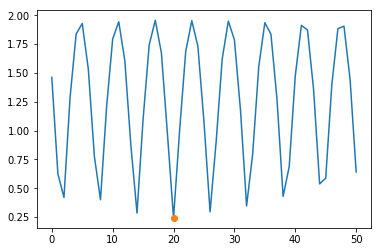

In [21]:
X,Y,nrmse_i,mi_i=testing_gene_net_derivative_file("Dataset1",csv_files[-1],a=a,b=b,c=c,n=20)
plot_MI_i("DBTBS", nrmse_i,n=20)
show()

In [19]:
min(nrmse_i, key=nrmse_i.get)

20

In [17]:
max(nrmse_i, key=nrmse_i.get)

3

In [ ]:
#rango de n

network_edge_list_DBTBS.csv
0.180181607791
0.180181607791
13  FINISHED
min 0


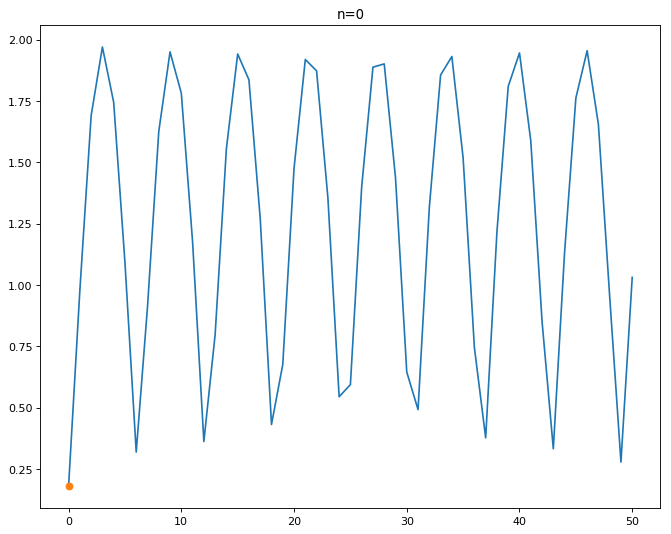

network_edge_list_DBTBS.csv
1.94205041389
1.94205041389
13  FINISHED
min 15


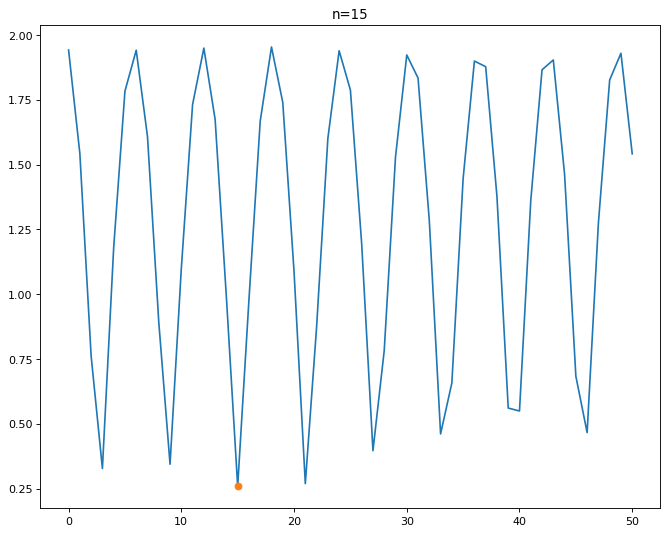

network_edge_list_DBTBS.csv
1.46803069692
1.46803069692
13  FINISHED
min 20


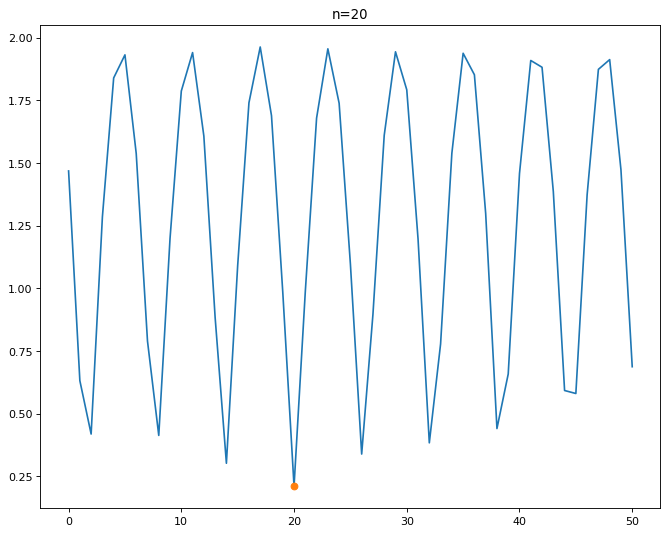

network_edge_list_DBTBS.csv
0.531124262781
0.531124262781
13  FINISHED
min 25


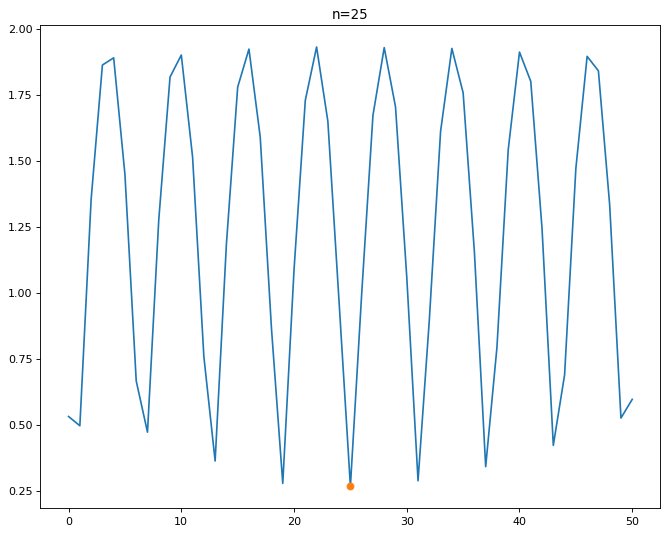

network_edge_list_DBTBS.csv
0.611816663794
0.611816663794
13  FINISHED
min 30


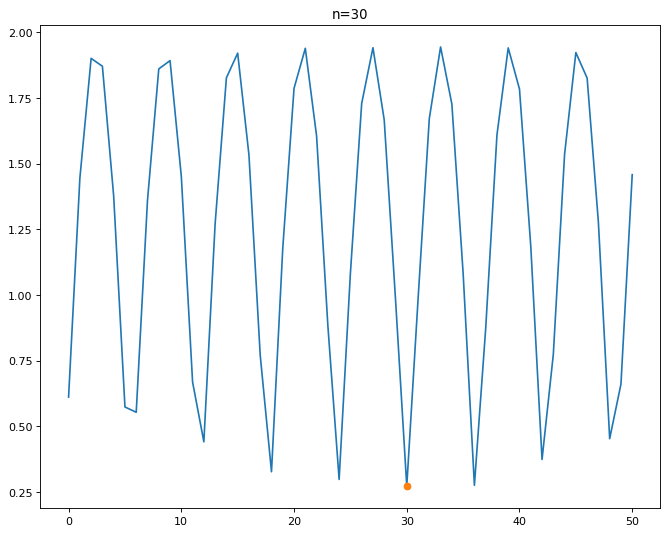

network_edge_list_DBTBS.csv
0.99182195855
0.99182195855
13  FINISHED
min 1


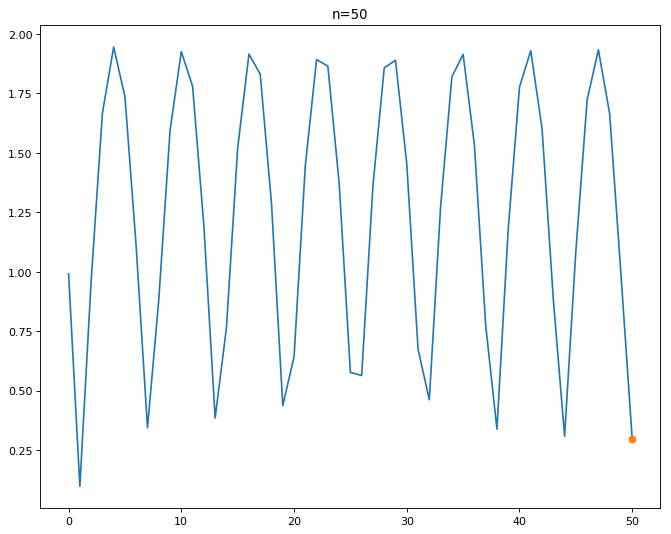

In [24]:
for n in [0,15,20,25,30,50]:
    X,Y,nrmse_i,mi_i=testing_gene_net_derivative_file("Dataset1",csv_files[-1],a=a,b=b,c=c,n=n)
    print("min",min(nrmse_i, key=nrmse_i.get))
    figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
    
    title("n="+str(n))
    plot_MI_i("DBTBS", nrmse_i,n)
    show()

In [ ]:
show()